#### 3.17

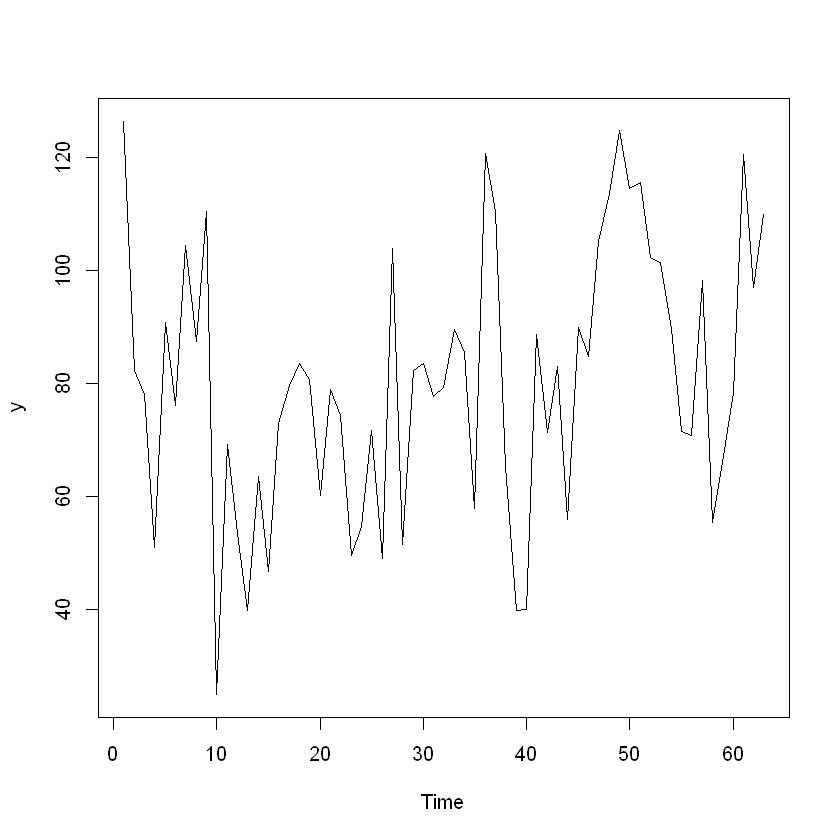

In [3]:
y = ts(c(126.4, 82.4, 78.1, 51.1, 90.9, 76.2, 104.5, 87.4, 110.5, 25, 69.3, 53.5, 39.8, 63.6, 46.7, 72.9, 79.6, 83.6, 80.7, 60.3, 79, 74.4, 49.6, 54.7, 71.8, 49.1, 103.9, 51.6, 82.4, 83.6, 77.8, 79.3, 89.6, 85.5, 58, 120.7, 110.5, 65.4, 39.9, 40.1, 88.7, 71.4, 83, 55.9, 89.9, 84.8, 105.2, 113.7, 124.7, 114.5, 115.6, 102.4, 101.4, 89.8, 71.5, 70.9, 98.3, 55.5, 66.1, 78.4, 120.5, 97, 110), frequency = 1)
plot(y)

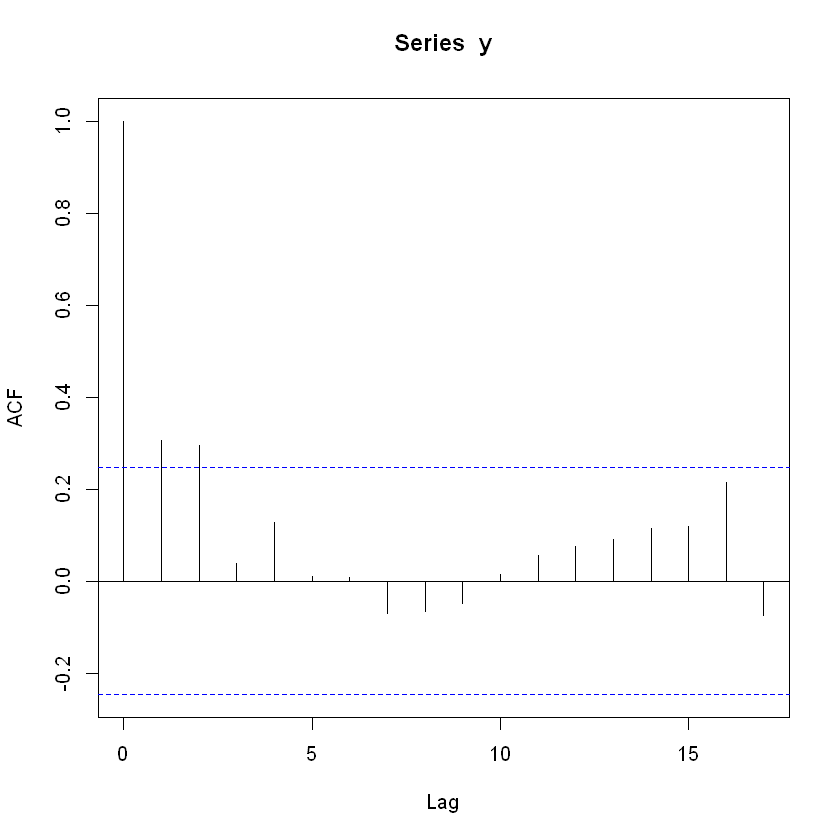

In [4]:
acf(y)

In [10]:
Box.test(y, type = "Ljung-Box", lag=6)


	Box-Ljung test

data:  y
X-squared = 13.284, df = 6, p-value = 0.03874


##### 3.17(1)
平稳，不存在纯随机性

##### 3.17(2)
选择AR(1)进行建模  
$$
y_t = \beta_0 + \beta_1 y_{t - 1} + \varepsilon_t
$$

In [30]:
library(forecast)
fit = arima(y, order=c(1,0,0), include.mean = T)
fit


Call:
arima(x = y, order = c(1, 0, 0), include.mean = T)

Coefficients:
         ar1  intercept
      0.3302    80.8794
s.e.  0.1236     4.1723

sigma^2 estimated as 496.8:  log likelihood = -285.01,  aic = 576.01

In [31]:
accuracy(fit)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.2791505,22.28812,17.45767,-10.99752,27.24354,0.8359403,-0.08951283


   Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
64       90.49460 61.93122 119.0580 46.81068 134.1785
65       84.05418 53.97404 114.1343 38.05057 130.0578
66       81.92764 51.68673 112.1685 35.67816 128.1771
67       81.22549 50.96710 111.4839 34.94928 127.5017
68       80.99364 50.73335 111.2539 34.71453 127.2728

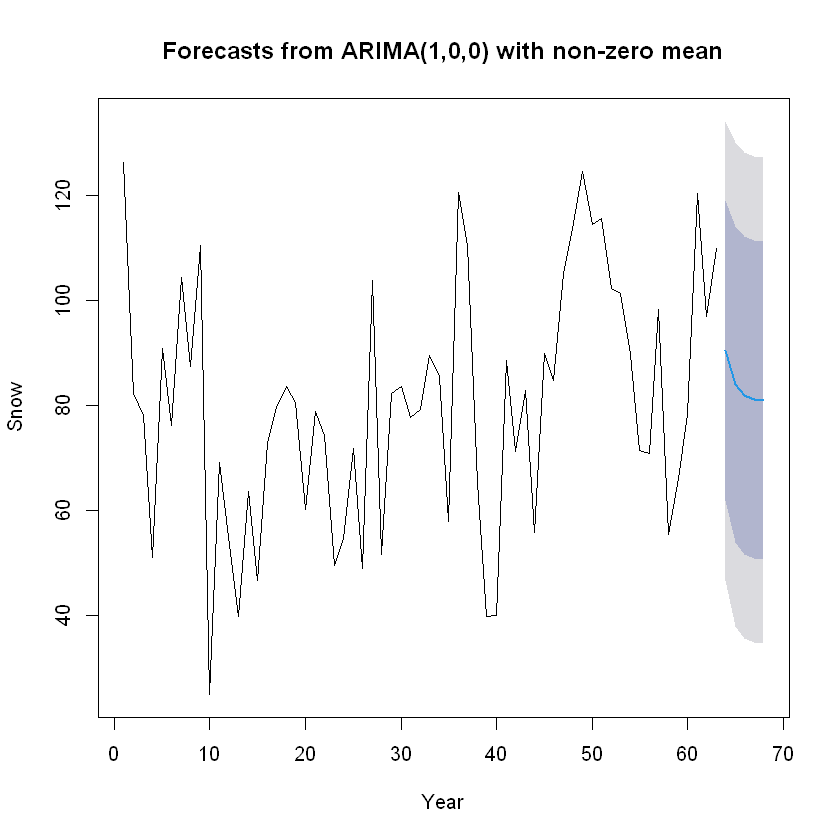

In [32]:
forecast(fit, 5)
plot(forecast(fit, 5), xlab="Year", ylab="Snow")

#### 3.17 19

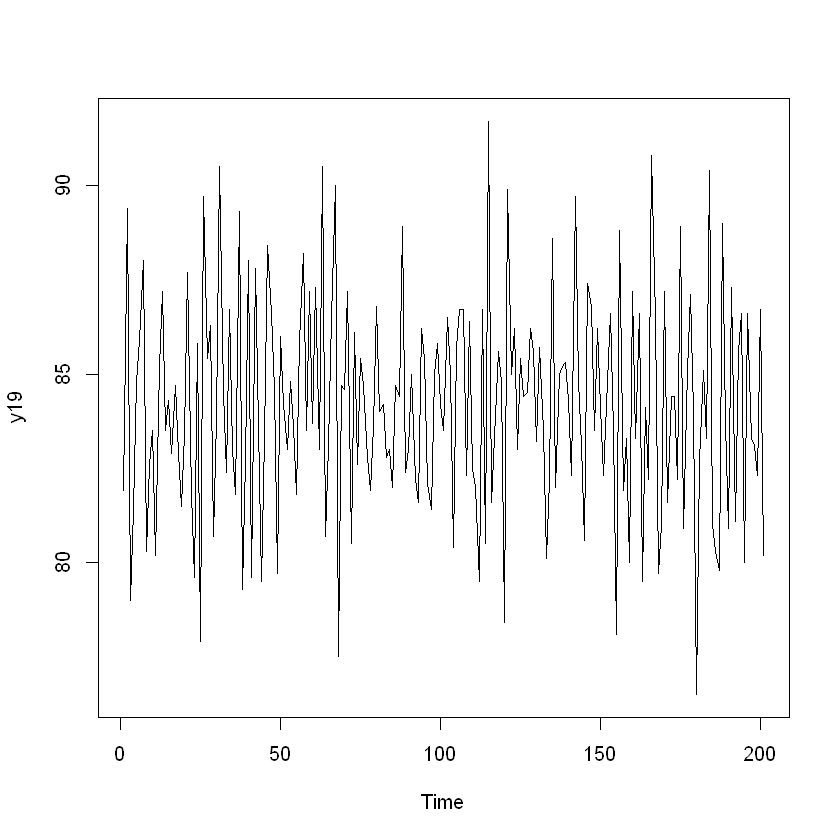

In [33]:
y19 = ts(c(81.9,89.4,79.0,81.4,84.8,85.9,88.0,80.3,82.6,83.5,80.2,85.2,87.2,83.5,84.3,82.9,84.7,82.9,81.5,83.4,87.7,81.8,79.6,85.8,77.9,89.7,85.4,86.3,80.7,83.8,90.5,84.5,82.4,86.7,83.0,81.8,89.3,79.3,82.7,88.0,79.6,87.8,83.6,79.5,83.3,88.4,86.6,84.6,79.7,86.0,84.2,83.0,84.8,83.6,81.8,85.9,88.2,83.5,87.2,83.7,87.3,83.0,90.5,80.7,83.1,86.5,90.0,77.5,84.7,84.6,87.2,80.5,86.1,82.6,85.4,84.7,82.8,81.9,83.6,86.8,84.0,84.2,82.8,83.0,82.0,84.7,84.4,88.9,82.4,83.0,85.0,82.2,81.6,86.2,85.4,82.1,81.4,85.0,85.8,84.2,83.5,86.5,85.0,80.4,85.7,86.7,86.7,82.3,86.4,82.5,82.0,79.5,86.7,80.5,91.7,81.6,83.9,85.6,84.8,78.4,89.9,85.0,86.2,83.0,85.4,84.4,84.5,86.2,85.6,83.2,85.7,83.5,80.1,82.2,88.6,82.0,85.0,85.2,85.3,84.3,82.3,89.7,84.8,83.1,80.6,87.4,86.8,83.5,86.2,84.1,82.3,84.8,86.6,83.5,78.1,88.8,81.9,83.3,80.0,87.2,83.3,86.6,79.5,84.1,82.2,90.8,86.5,79.7,81.0,87.2,81.6,84.4,84.4,82.2,88.9,80.9,85.1,87.1,84.0,76.5,82.7,85.1,83.3,90.4,81.0,80.3,79.8,89.0,83.7,80.9,87.3,81.1,85.6,86.6,80.0,86.6,83.3,83.1,82.3,86.7,80.2), frequency = 1)
plot(y19)


	Box-Ljung test

data:  y19
X-squared = 31.083, df = 6, p-value = 2.444e-05


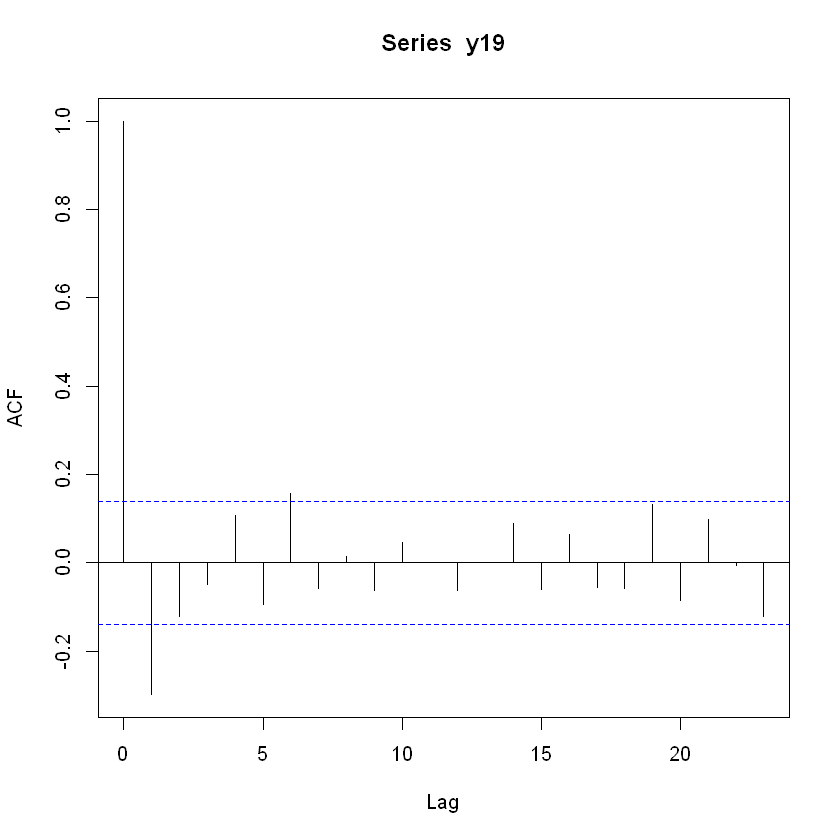

In [35]:
acf(y19)
Box.test(y19, type="Ljung-Box", lag=6)

##### 3.19(1)
平稳非白噪声序列

##### 3.19(2)
采用自动定阶函数 MA(2)模型

In [39]:
library(zoo)
library(forecast)
fit19 = auto.arima(y19)
fit19

Series: y19 
ARIMA(0,0,2) with non-zero mean 

Coefficients:
          ma1      ma2     mean
      -0.4106  -0.1070  84.1308
s.e.   0.0707   0.0652   0.0911

sigma^2 = 7.177:  log likelihood = -481.9
AIC=971.81   AICc=972.01   BIC=985.02

##### 3.19(3)

    Point Forecast    Lo 80   Hi 80    Lo 95   Hi 95
202       85.43736 82.00402 88.8707 80.18652 90.6882

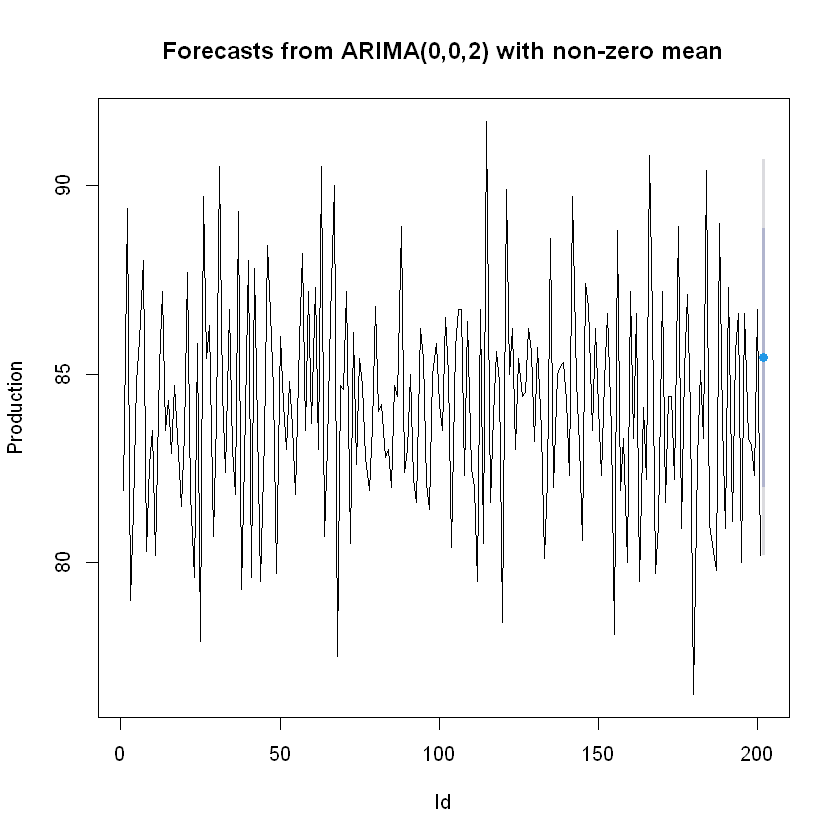

In [40]:
forecast(fit19, 1)
plot(forecast(fit19, 1), xlab="Id", ylab="Production")